## Download Compustat data from WRDS

-------------------------

### Import libraries

In [1]:
import pandas as pd
import wrds
pd.options.display.max_columns=200

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download funda from Compustat

In [43]:
df= conn.raw_sql(f"""select *
                    from audit.ipo
                    """)
print(df.shape)

(10082, 209)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10082 entries, 0 to 10081
Columns: 209 entries, ipo_info_key to best_edgar_ticker
dtypes: float64(160), object(49)
memory usage: 16.1+ MB


In [45]:
# df = df[df.columns.drop(list(df.filter(regex='matchfy')))]
df = df[df.columns.drop(list(df.filter(regex='matchqu')))]
df = df[df.columns.drop(list(df.filter(regex='priorfy')))]
df = df[df.columns.drop(list(df.filter(regex='priorqu')))]
df = df[df.columns.drop(list(df.filter(regex='closestfy')))]
df = df[df.columns.drop(list(df.filter(regex='closestqu')))]
df.shape

(10082, 63)

In [46]:
df.filter(regex=r'matchfy_incmst.*ttm').dropna().head()

,matchfy_incmst_rev_ttm,matchfy_incmst_netinc_ttm,matchfy_incmst_extraitm_ttm,matchfy_incmst_ebitda_ttm
23,9.329600e+09,-1.829000e+08,0.0,626000000.0
46,1.824899e+09,9.410200e+07,0.0,183560000.0
122,7.417702e+09,1.349440e+08,0.0,837309000.0
187,1.812808e+09,1.559632e+09,0.0,0.0
259,1.789776e+09,7.630000e+07,0.0,0.0


In [47]:
df.rename(columns={'matchfy_incmst_rev_ttm':'rev', 'matchfy_incmst_netinc_ttm':'ni'}, inplace= True)

In [48]:
df.head()

,ipo_info_key,ipo_date,ipo_date_raw,ipo_name,ipo_tick,ipo_shares,ipo_price,prior_ipo_reg_form,prior_ipo_reg_date,auditor_fkey_at_ipo,aud_name_ipo_date,ipo_desc,accounting_fees,legal_fees,curr_code_fkey,curr_accounting_fees,curr_legal_fees,company_fkey,matchfy_price_date,matchfy_price_close,matchfy_tso_date,matchfy_tso,matchfy_tso_markcap,matchfy_date_qtr,matchfy_date_ttm,matchfy_filing_code_qtr,matchfy_filing_code_ttm,matchfy_annual_quindic,matchfy_balsh_book_val,matchfy_balsh_assets,matchfy_balsh_cash_equivs,matchfy_incmst_rev_qtr,rev,matchfy_incmst_netinc_qtr,ni,matchfy_incmst_extraitm_qtr,matchfy_incmst_extraitm_ttm,matchfy_incmst_ebitda_qtr,matchfy_incmst_ebitda_ttm,matchfy_eff_accchange_qtr,matchfy_eff_accchange_ttm,matchfy_cshflst_op_act_qtr,matchfy_cshflst_op_act_ttm,matchfy_cshflst_inv_act_qtr,matchfy_cshflst_inv_act_ttm,matchfy_cshflst_fin_act_qtr,matchfy_cshflst_fin_act_ttm,matchfy_cshflst_change_qtr,matchfy_cshflst_change_ttm,matchfy_sumfees_fy_end,matchfy_sumfees_fy,matchfy_sum_audfees,matchfy_sum_nonaud,matchfy_sum_benfees,matchfy_sum_itfees,matchfy_sum_taxfees,matchfy_sum_audrel_fees,matchfy_sum_other,matchfy_sum_total,eventdate_aud_fkey,eventdate_aud_name,ipo_type,best_edgar_ticker
0,4161.0,1967-01-01,19670000.0,AAR Corp,AIR,0.0,0.0,None,None,216.0,unknown,None,NaN,NaN,USD,NaN,NaN,0000001750,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,None,None,AIR
1,2677.0,1929-01-01,19290000.0,None,None,0.0,0.0,None,None,216.0,unknown,None,NaN,NaN,USD,NaN,NaN,0000001800,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,None,None,ABT
2,5219.0,1962-01-01,19620000.0,Aceto Corp,ACET,0.0,0.0,None,None,216.0,unknown,None,NaN,NaN,USD,NaN,NaN,0000002034,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,None,None,None
3,2872.0,1994-01-01,19940000.0,None,None,0.0,0.0,None,None,1.0,PricewaterhouseCoopers LLP,None,NaN,NaN,USD,NaN,NaN,0000002135,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,PricewaterhouseCoopers LLP,None,None
4,5541.0,1982-12-01,19821200.0,Relm Wireless Corp,RWC,0.0,37.5,None,None,216.0,unknown,Initial Public Offering,NaN,NaN,USD,NaN,NaN,0000002186,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,None,Traditional,BKTI


In [49]:
df=df[['company_fkey', 'ipo_tick', 'ipo_name', 'ipo_date', 'auditor_fkey_at_ipo', 'accounting_fees', 'legal_fees', 'ipo_type', 'rev', 'ni']]
df.dropna(inplace= True)
df.shape

(3833, 10)

In [50]:
df.head()

,company_fkey,ipo_tick,ipo_name,ipo_date,auditor_fkey_at_ipo,accounting_fees,legal_fees,ipo_type,rev,ni
72,0000015615,MTZ,Mastec Inc,1997-02-14,1.0,50000.0,100000.0,Traditional,6.594390e+08,34664000.0
87,0000018169,DOLE,DOLE FOOD CO INC,2009-10-22,3.0,1500000.0,1000000.0,Traditional,6.778500e+09,132349500.0
145,0000029534,DG,Dollar General Corp,2009-11-13,2.0,800000.0,1500000.0,Traditional,1.179638e+10,339442000.0
147,0000029806,CNST,Constar International Inc,2002-11-14,1.0,1200000.0,2250000.0,Traditional,7.043280e+08,-35388000.0
159,0000031347,ELON,Echelon Corp,1998-07-27,5.0,150000.0,300000.0,Traditional,3.220100e+07,-5851000.0


In [51]:
df.ipo_type.value_counts()

Traditional                                   3598
Special Purpose Acquisition Company (SPAC)     227
Direct Listing                                   8
Name: ipo_type, dtype: int64

In [52]:
df[df.ipo_type=='Traditional']
df.drop(columns='ipo_type', inplace= True)

In [53]:
df.head()

,company_fkey,ipo_tick,ipo_name,ipo_date,auditor_fkey_at_ipo,accounting_fees,legal_fees,rev,ni
72,0000015615,MTZ,Mastec Inc,1997-02-14,1.0,50000.0,100000.0,6.594390e+08,34664000.0
87,0000018169,DOLE,DOLE FOOD CO INC,2009-10-22,3.0,1500000.0,1000000.0,6.778500e+09,132349500.0
145,0000029534,DG,Dollar General Corp,2009-11-13,2.0,800000.0,1500000.0,1.179638e+10,339442000.0
147,0000029806,CNST,Constar International Inc,2002-11-14,1.0,1200000.0,2250000.0,7.043280e+08,-35388000.0
159,0000031347,ELON,Echelon Corp,1998-07-27,5.0,150000.0,300000.0,3.220100e+07,-5851000.0


In [57]:
df.rename(columns={'accounting_fees':'afees', 'legal_fees':'lfees'}, inplace= True)

In [106]:
df['big4']=0
df.loc[df['auditor_fkey_at_ipo']<=4, 'big4']= 1

### Close connection

In [6]:
conn.close()

-------------------------

In [69]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
lm= LinearRegression()
x=df[['afees']]
y=df[['lfees']]
lm.fit(x,y)

LinearRegression()

In [61]:
yhat= lm.predict(x)

In [100]:
df['lfees_hat']= yhat

In [64]:
lm.intercept_

array([788332.65119723])

In [65]:
lm.coef_

array([[0.64497483]])

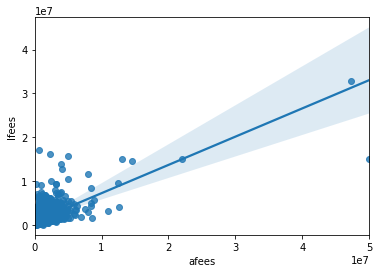

In [70]:
sns.regplot(x= 'afees', y='lfees', data= df)
plt.show()

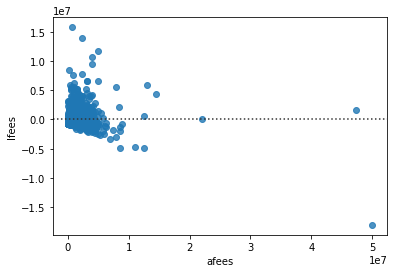

In [105]:
sns.residplot(x='afees', y='lfees', data=df)
plt.show()

<AxesSubplot:xlabel='lfees', ylabel='Density'>

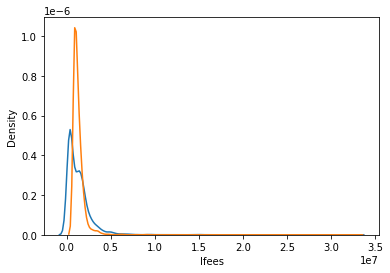

In [103]:
ax1= sns.kdeplot(x='lfees', data=df)
sns.kdeplot(x='lfees_hat', data=df, ax=ax1)

In [114]:
df.afees.describe()

count    3.833000e+03
mean     7.967409e+05
std      1.516957e+06
min      0.000000e+00
25%      1.650000e+05
50%      5.000000e+05
75%      1.000000e+06
max      5.000000e+07
Name: afees, dtype: float64

In [121]:
df.shape

(3833, 11)

In [129]:
df2=df[(df.afees < 10**6) & (df.lfees < 10**6)  ]

In [130]:
df2.shape

(1844, 11)

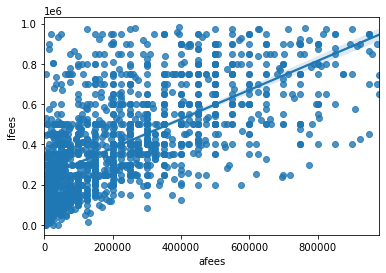

In [131]:
sns.regplot(x='afees', y='lfees', data= df2)
plt.show()

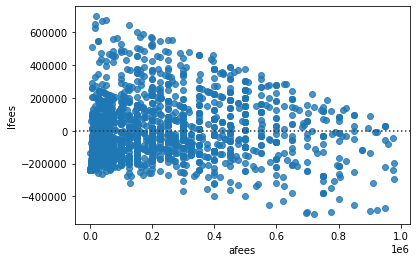

In [132]:
sns.residplot(x='afees', y='lfees', data= df2)
plt.show()

In [134]:
import numpy as np

In [137]:
df['log_afees']= np.log10(1+df['afees'])
df['log_lfees']= np.log10(1+df['lfees'])

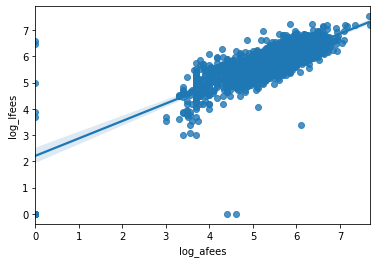

In [139]:
sns.regplot(x='log_afees', y='log_lfees', data= df)
plt.show()

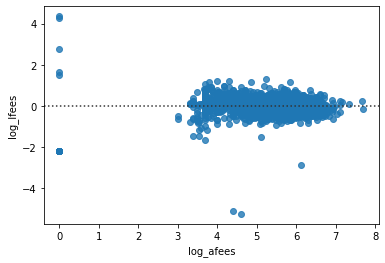

In [138]:
sns.residplot(x='log_afees', y='log_lfees', data= df)
plt.show()